# BI Analysis Prediction

Import libraries

In [726]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

Read data

In [727]:
df = pd.read_csv('dataset_2.csv', low_memory = False)
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


### Trips Completed Prediction

Remove the '%' sign and convert to float

In [728]:
df['Accept Rate'] = df['Accept Rate'].str.replace('%', '').astype(float) / 100

Feature engineering (example: create a new feature 'Trips per Hour')

In [729]:
df['Trips per Hour'] = df['Trips Completed'] / df['Supply Hours']

Select features and target variable

In [730]:
X = df[['Accept Rate', 'Supply Hours', 'Trips per Hour', 'Rating']]
y = df['Trips Completed']

Split data into training and testing sets

In [731]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [732]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.625442863794395
R-squared: 0.8770589686887743


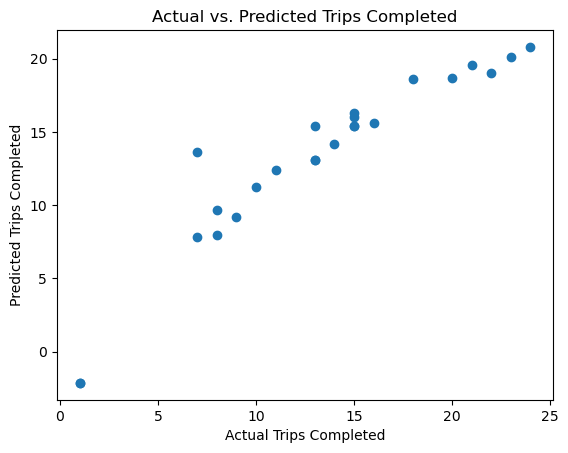

In [733]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed')
plt.show()

#### Decision Tree Regression

In [734]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R-squared: {dt_r2}")

Decision Tree - MSE: 1.875, R-squared: 0.950163813391168


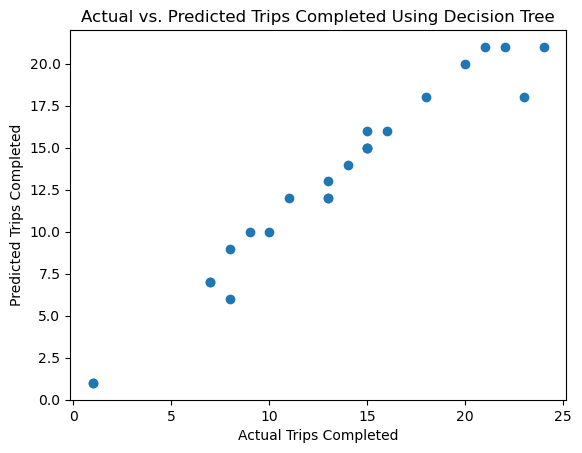

In [735]:
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Decision Tree')
plt.show()

#### Random Forest Regression

In [736]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R-squared: {rf_r2}")

Random Forest - MSE: 2.000875, R-squared: 0.946818144063495


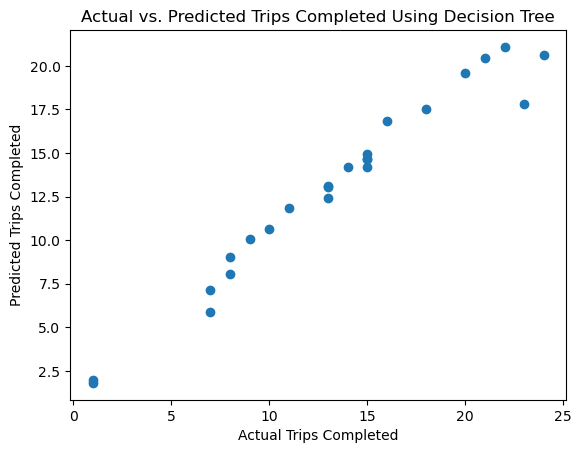

In [737]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Decision Tree')
plt.show()

#### XGBoost

In [ ]:
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Trips Completed')
plt.ylabel('Predicted Trips Completed')
plt.title('Actual vs. Predicted Trips Completed Using Decision Tree')
plt.show()

### Rating Prediction

In [739]:
X = df[['Accept Rate', 'Supply Hours', 'Trips per Hour', 'Trips Completed']]
y = df['Rating']

In [740]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [741]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.036711821874035926
R-squared: -0.8614444893877351


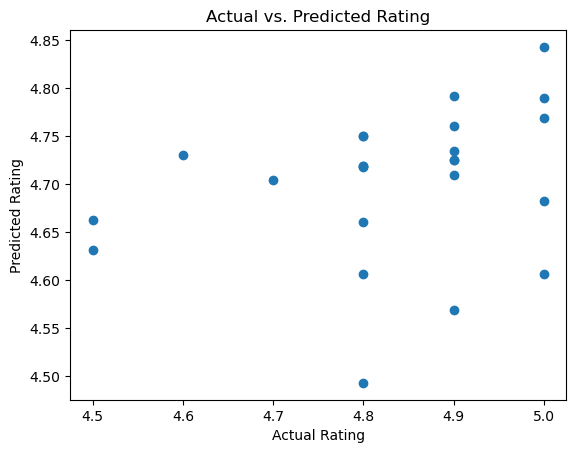

In [742]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating')
plt.show()

#### Accept Rate Prediction

In [743]:
X = df[['Trips Completed', 'Supply Hours', 'Trips per Hour', 'Rating']]
y = df['Accept Rate']

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [745]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [746]:
y_pred = model.predict(X_test)

In [747]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03917814813595199
R-squared: 0.13473897072132468


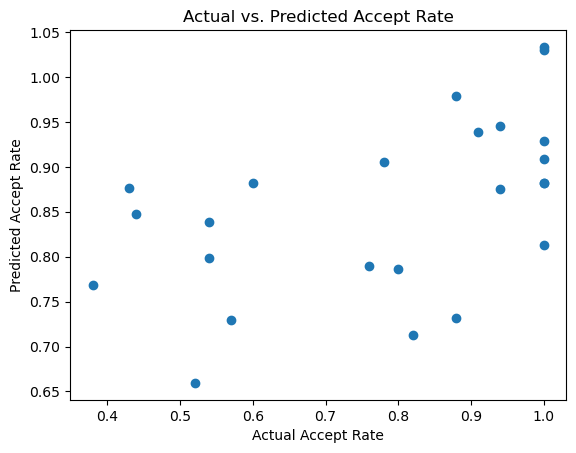

In [748]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Accept Rate')
plt.ylabel('Predicted Accept Rate')
plt.title('Actual vs. Predicted Accept Rate')
plt.show()

#### Supply Hours Prediction

In [749]:
X = df[['Accept Rate', 'Trips Completed', 'Trips per Hour', 'Rating']]
y = df['Supply Hours']

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [751]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [752]:
y_pred = model.predict(X_test)

In [753]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3939392837972766
R-squared: 0.8326924302006186


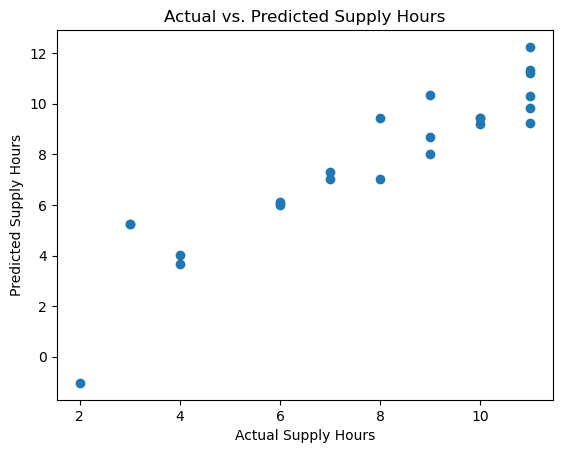

In [754]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Supply Hours')
plt.ylabel('Predicted Supply Hours')
plt.title('Actual vs. Predicted Supply Hours')
plt.show()

End